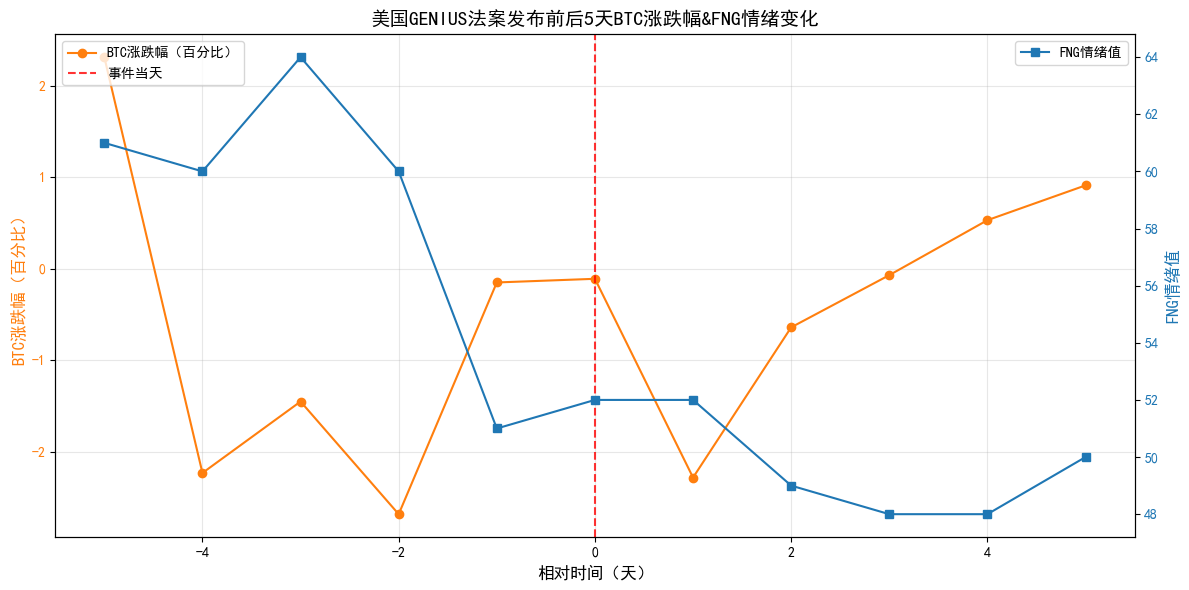

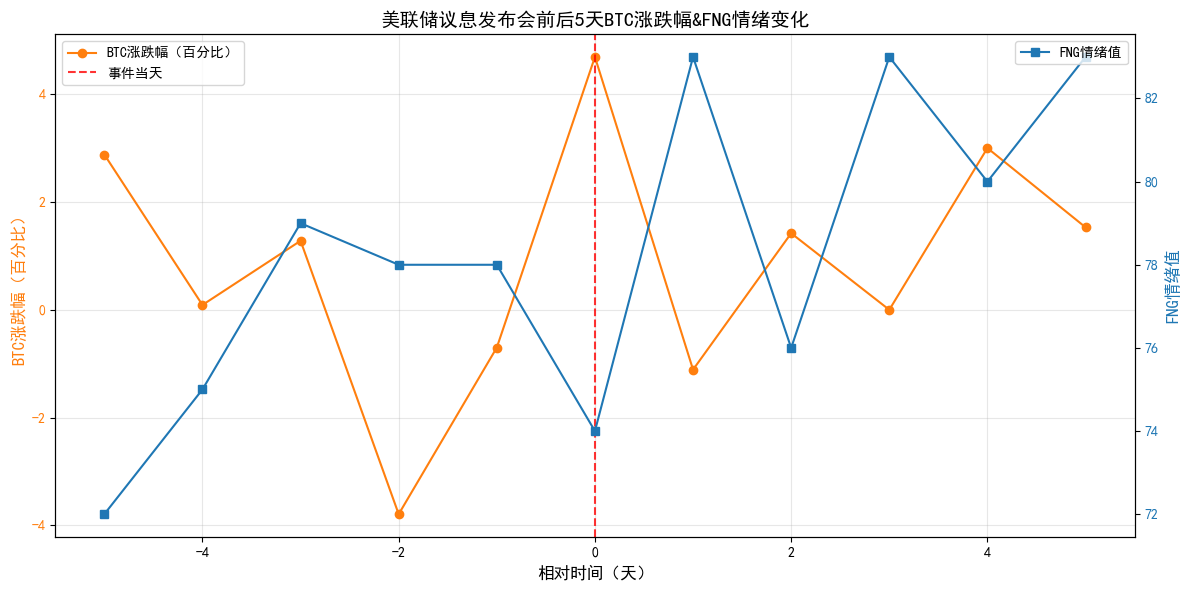

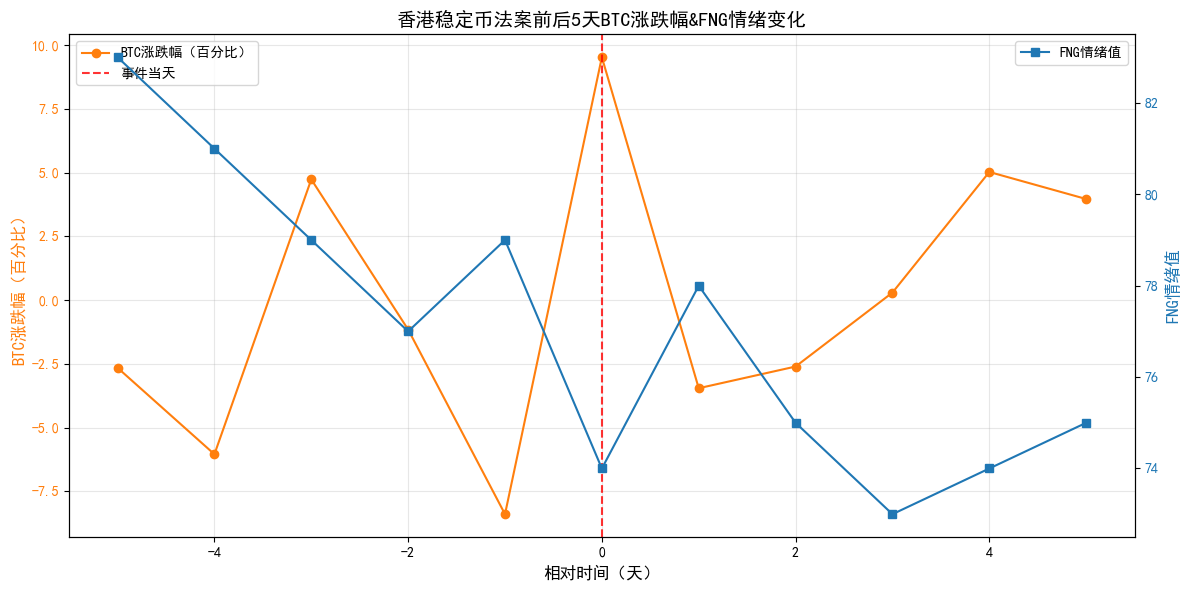

===== 路径3：重大事件分析结果 =====
           事件名称        事件日期  事件前5天涨跌幅均值(%)  事件当天涨跌幅(%)  事件后5天涨跌幅均值(%)  \
0  美国GENIUS法案发布  2023-05-10          -0.84       -0.11          -0.31   
1      美联储议息发布会  2024-12-11          -0.05        4.69           0.97   
2       香港稳定币法案  2024-03-20          -2.70        9.53           0.65   

   事件前5天情绪均值  事件当天情绪值  事件后5天情绪均值  
0       59.2       52       49.4  
1       76.4       74       81.0  
2       79.8       74       75.0  


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

# ========== 核心修复：指定支持中文的字体（解决Glyph缺失警告） ==========
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 替换为系统支持的中文字体
matplotlib.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

# ========== 1. 读取清洗后的数据 ==========
data_path = r"C:\Users\33759\Desktop\自选动作 陈正扬 2326010229\修改后数据\BTC_FNG_清洗后数据.xlsx"
df = pd.read_excel(data_path)
df['日期'] = pd.to_datetime(df['日期'])
df = df.set_index('日期')  # 设日期为索引，便于按时间筛选

# ========== 2. 定义重大事件及分析窗口（事件前5天、事件当天、事件后5天） ==========
events = {
    '美国GENIUS法案发布': '2023-05-10',
    '美联储议息发布会': '2024-12-11',
    '香港稳定币法案': '2024-03-20'
}
window_days = 5  # 事件前后分析窗口（可调整）

# 存储事件分析结果
event_results = []

for event_name, event_date in events.items():
    event_date = pd.to_datetime(event_date)
    if event_date not in df.index:
        print(f"⚠️ 事件{event_name}的日期{event_date.date()}不在数据范围内，跳过")
        continue

    # 筛选事件前后窗口数据
    start_date = event_date - pd.Timedelta(days=window_days)
    end_date = event_date + pd.Timedelta(days=window_days)
    event_window = df.loc[start_date:end_date].copy()

    # 计算相对时间（用于绘图：-5~+5，0为事件当天）
    event_window['相对时间'] = (event_window.index - event_date).days

    # 统计关键指标
    pre_event = event_window[event_window['相对时间'] < 0]  # 事件前
    post_event = event_window[event_window['相对时间'] > 0]  # 事件后
    event_day = event_window[event_window['相对时间'] == 0]  # 事件当天

    # 整理结果
    result = {
        '事件名称': event_name,
        '事件日期': event_date.date(),
        '事件前5天涨跌幅均值(%)': pre_event['涨跌幅（百分比）'].mean().round(2),
        '事件当天涨跌幅(%)': event_day['涨跌幅（百分比）'].values[0].round(2) if len(event_day) > 0 else np.nan,
        '事件后5天涨跌幅均值(%)': post_event['涨跌幅（百分比）'].mean().round(2),
        '事件前5天情绪均值': pre_event['情绪值'].mean().round(2),
        '事件当天情绪值': event_day['情绪值'].values[0].round(2) if len(event_day) > 0 else np.nan,
        '事件后5天情绪均值': post_event['情绪值'].mean().round(2)
    }
    event_results.append(result)

    # ========== 可视化：单个事件前后价格&情绪变化 ==========
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # 左轴：涨跌幅（百分比）
    ax1.plot(event_window['相对时间'], event_window['涨跌幅（百分比）'],
             color='#ff7f0e', marker='o', label='BTC涨跌幅（百分比）')
    ax1.axvline(x=0, color='red', linestyle='--', alpha=0.8, label='事件当天')
    ax1.set_xlabel('相对时间（天）', fontsize=12)
    ax1.set_ylabel('BTC涨跌幅（百分比）', color='#ff7f0e', fontsize=12)
    ax1.tick_params(axis='y', labelcolor='#ff7f0e')
    ax1.legend(loc='upper left')
    ax1.grid(alpha=0.3)

    # 右轴：情绪值
    ax2 = ax1.twinx()
    ax2.plot(event_window['相对时间'], event_window['情绪值'],
             color='#1f77b4', marker='s', label='FNG情绪值')
    ax2.set_ylabel('FNG情绪值', color='#1f77b4', fontsize=12)
    ax2.tick_params(axis='y', labelcolor='#1f77b4')
    ax2.legend(loc='upper right')

    plt.title(f'{event_name}前后{window_days}天BTC涨跌幅&FNG情绪变化', fontsize=14)
    plt.tight_layout()
    # 保存时避免路径含中文乱码
    plt.savefig(rf"C:\Users\33759\Desktop\自选动作 陈正扬 2326010229\结果数据\路径3_{event_name}_事件分析图.png",
                dpi=300, bbox_inches='tight', format='png')
    plt.show()

# ========== 3. 整理并保存事件分析结果 ==========
event_df = pd.DataFrame(event_results)
print("===== 路径3：重大事件分析结果 =====")
print(event_df)

# 保存结果
event_df.to_excel(r"C:\Users\33759\Desktop\自选动作 陈正扬 2326010229\结果数据\路径3_重大事件分析结果.xlsx",
                  index=False, engine='openpyxl')